In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import os
import env


# Acquire the Data

In [2]:
def get_connection(db: str, user: str = env.user, host: str = env.host, password=env.password) -> str:
    return f"mysql+pymysql://{user}:{password}@{host}/{db}"

def get_zillow_data(file_name="zillow.csv") -> pd.DataFrame:
    if os.path.isfile(file_name):
        return pd.read_csv(file_name)
    query = """select propertylandusedesc, bedroomcnt, 
               bathroomcnt, calculatedfinishedsquarefeet, 
               taxvaluedollarcnt, yearbuilt, taxamount, fips
               from propertylandusetype 
               join properties_2017
               using (propertylandusetypeid)
               where propertylandusedesc = 'Single Family Residential'
            """
    connection = get_connection("zillow")
    df = pd.read_sql(query, connection)
    df.to_csv(file_name, index=False)
    return df

In [3]:
df = get_zillow_data()
df

,propertylandusedesc,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,Single Family Residential,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,Single Family Residential,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,Single Family Residential,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,Single Family Residential,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,Single Family Residential,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
...,...,...,...,...,...,...,...,...
2152858,Single Family Residential,4.0,3.0,2262.0,960756.0,2015.0,13494.52,6059.0
2152859,Single Family Residential,4.0,4.5,3127.0,536061.0,2014.0,6244.16,6059.0
2152860,Single Family Residential,0.0,0.0,NaN,208057.0,NaN,5783.88,6059.0
2152861,Single Family Residential,3.0,2.5,1974.0,424353.0,2015.0,5302.70,6059.0


# Sample and Summarize

In [4]:
df.sample(5) # gives me 5 random rows from the dataframe 

,propertylandusedesc,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
1863082,Single Family Residential,3.0,1.5,1248.0,62059.0,1961.0,1045.22,6111.0
929408,Single Family Residential,3.0,2.0,1627.0,7945261.0,2010.0,92919.65,6037.0
185951,Single Family Residential,4.0,3.0,1835.0,364175.0,1953.0,4277.63,6037.0
1972625,Single Family Residential,3.0,2.0,1299.0,294255.0,1952.0,3554.48,6037.0
1564537,Single Family Residential,4.0,4.0,3694.0,3000000.0,1957.0,36095.81,6037.0


In [5]:
df.describe().T # gives me the summary statistics and transpose them for better view

,count,mean,std,min,25%,50%,75%,max
bedroomcnt,2152852.0,3.287196,0.954754,0.00,3.00,3.00,4.00,25.00
bathroomcnt,2152852.0,2.230688,0.999280,0.00,2.00,2.00,3.00,32.00
calculatedfinishedsquarefeet,2144379.0,1862.855178,1222.125124,1.00,1257.00,1623.00,2208.00,952576.00
taxvaluedollarcnt,2152370.0,461896.237963,699676.049600,1.00,188170.25,327671.00,534527.00,98428909.00
yearbuilt,2143526.0,1960.949681,22.162196,1801.00,1949.00,1958.00,1976.00,2016.00
taxamount,2148421.0,5634.865978,8178.910249,1.85,2534.98,4108.95,6414.32,1337755.86
fips,2152863.0,6048.377335,20.433292,6037.00,6037.00,6037.00,6059.00,6111.00


In [6]:
df.shape # shows number of rows and columns respectivly 

(2152863, 8)

In [7]:
df.size # count of elements in the array 

17222904

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152863 entries, 0 to 2152862
Data columns (total 8 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   propertylandusedesc           object 
 1   bedroomcnt                    float64
 2   bathroomcnt                   float64
 3   calculatedfinishedsquarefeet  float64
 4   taxvaluedollarcnt             float64
 5   yearbuilt                     float64
 6   taxamount                     float64
 7   fips                          float64
dtypes: float64(7), object(1)
memory usage: 131.4+ MB


In [9]:
# want to change Dtypes for yearbuilt, fips, and bedrooms into ints becasue we cant have decemalts 

In [10]:
# rename colums for me 

In [11]:
df.isnull().any()

propertylandusedesc             False
bedroomcnt                       True
bathroomcnt                      True
calculatedfinishedsquarefeet     True
taxvaluedollarcnt                True
yearbuilt                        True
taxamount                        True
fips                            False
dtype: bool

In [12]:
df.isnull().sum()

propertylandusedesc                0
bedroomcnt                        11
bathroomcnt                       11
calculatedfinishedsquarefeet    8484
taxvaluedollarcnt                493
yearbuilt                       9337
taxamount                       4442
fips                               0
dtype: int64

In [13]:
df.isnull().mean()

propertylandusedesc             0.000000
bedroomcnt                      0.000005
bathroomcnt                     0.000005
calculatedfinishedsquarefeet    0.003941
taxvaluedollarcnt               0.000229
yearbuilt                       0.004337
taxamount                       0.002063
fips                            0.000000
dtype: float64

### we do have null values however they represent less than one percent of our data so I will drop them 

In [14]:
df = df.dropna()
df.isnull().sum() # verify 

propertylandusedesc             0
bedroomcnt                      0
bathroomcnt                     0
calculatedfinishedsquarefeet    0
taxvaluedollarcnt               0
yearbuilt                       0
taxamount                       0
fips                            0
dtype: int64

In [15]:
# change column names 

df.rename(columns={"bedroomcnt": "bed_rooms", "bathroomcnt": "bath_room", "propertylandusedesc": "home_class", "calculatedfinishedsquarefeet": "finished_sqft", 
"taxvaluedollarcnt": "tax_value", "yearbuild": "year_build", "taxamount": "tax_amount", "fips": "county_code"})


,home_class,bed_rooms,bath_room,finished_sqft,tax_value,yearbuilt,tax_amount,county_code
4,Single Family Residential,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
6,Single Family Residential,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,Single Family Residential,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
11,Single Family Residential,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0
14,Single Family Residential,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0
...,...,...,...,...,...,...,...,...
2152856,Single Family Residential,4.0,4.0,4375.0,422400.0,2015.0,13877.56,6037.0
2152858,Single Family Residential,4.0,3.0,2262.0,960756.0,2015.0,13494.52,6059.0
2152859,Single Family Residential,4.0,4.5,3127.0,536061.0,2014.0,6244.16,6059.0
2152861,Single Family Residential,3.0,2.5,1974.0,424353.0,2015.0,5302.70,6059.0


In [16]:
df.yearbuilt.count(), df.yearbuilt.isnull().sum()

(2140235, 0)

Text(0.5, 1.0, 'Year Built')

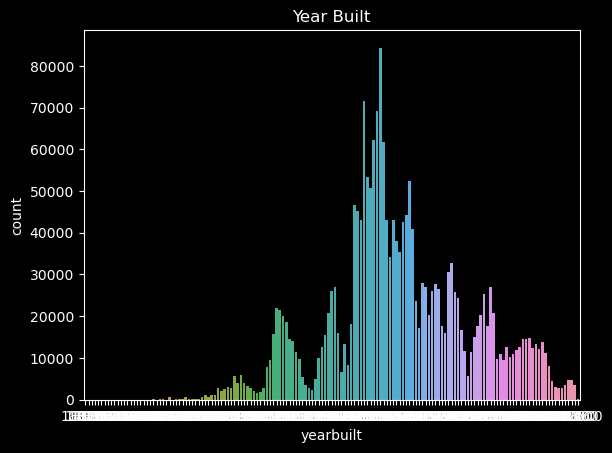

In [17]:
sns.countplot(data=df, x=df.yearbuilt)
plt.title("Year Built")

In [18]:
df['yearbuilt'] = df['yearbuilt'].fillna(df.yearbuilt.mean())
df.isnull().sum()

/var/folders/6d/_03p2v5j0rd067n1f34klb7w0000gn/T/ipykernel_17211/4142382911.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['yearbuilt'] = df['yearbuilt'].fillna(df.yearbuilt.mean())


propertylandusedesc             0
bedroomcnt                      0
bathroomcnt                     0
calculatedfinishedsquarefeet    0
taxvaluedollarcnt               0
yearbuilt                       0
taxamount                       0
fips                            0
dtype: int64

### for year built  I will fill na with the mean of year built because the graph looks like a normal distridution. 

In [19]:
df.taxamount.count(), df.taxamount.isnull().sum()

(2140235, 0)

In [20]:
# sns.countplot(data=df, x=df.taxamount)

In [21]:
df.taxamount.describe()

count    2.140235e+06
mean     5.616711e+03
std      7.814563e+03
min      6.340000e+00
25%      2.540850e+03
50%      4.111470e+03
75%      6.411930e+03
max      1.078102e+06
Name: taxamount, dtype: float64

In [22]:
df['taxamount'] = df['taxamount'].fillna(df.taxamount.mean())


/var/folders/6d/_03p2v5j0rd067n1f34klb7w0000gn/T/ipykernel_17211/3894330670.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['taxamount'] = df['taxamount'].fillna(df.taxamount.mean())


### for tax amount I will be 

In [23]:
df.taxvaluedollarcnt.count(), df.taxvaluedollarcnt.isnull().sum()

(2140235, 0)

In [24]:
df.isnull().sum()

propertylandusedesc             0
bedroomcnt                      0
bathroomcnt                     0
calculatedfinishedsquarefeet    0
taxvaluedollarcnt               0
yearbuilt                       0
taxamount                       0
fips                            0
dtype: int64

In [25]:
df.taxvaluedollarcnt.describe()

count    2.140235e+06
mean     4.606416e+05
std      6.771576e+05
min      2.200000e+01
25%      1.891660e+05
50%      3.282960e+05
75%      5.346060e+05
max      9.018846e+07
Name: taxvaluedollarcnt, dtype: float64

In [26]:
def wrangle_zillow(df):
    df = get_zillow_data()
    df['calculatedfinishedsquarefeet'] = df['calculatedfinishedsquarefeet'].fillna(df.calculatedfinishedsquarefeet.mean())
    df['yearbuilt'] = df['yearbuilt'].fillna(df.yearbuilt.mean())
    df['taxamount'] = df['taxamount'].fillna(df.taxamount.mean())
    df = df.dropna(subset=['bathroomcnt', 'bedroomcnt', 'taxvaluedollarcnt'])
    return df



    

In [27]:
new_df = get_zillow_data()
new_df.sample(3)

,propertylandusedesc,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
879097,Single Family Residential,3.0,3.0,2496.0,461938.0,1958.0,5712.79,6037.0
613175,Single Family Residential,2.0,1.5,900.0,168609.0,1964.0,2262.86,6059.0
1653543,Single Family Residential,4.0,3.0,2608.0,760962.0,1972.0,8912.26,6037.0


In [28]:
df = wrangle_zillow(new_df)
df.isnull().sum()

propertylandusedesc             0
bedroomcnt                      0
bathroomcnt                     0
calculatedfinishedsquarefeet    0
taxvaluedollarcnt               0
yearbuilt                       0
taxamount                       0
fips                            0
dtype: int64

In [29]:
df.shape

(2152359, 8)

In [30]:
df = get_zillow_data()
df.isnull().mean()

propertylandusedesc             0.000000
bedroomcnt                      0.000005
bathroomcnt                     0.000005
calculatedfinishedsquarefeet    0.003941
taxvaluedollarcnt               0.000229
yearbuilt                       0.004337
taxamount                       0.002063
fips                            0.000000
dtype: float64

In [31]:
df.bedroomcnt.value_counts()

bedroomcnt
3.0     964298
4.0     634289
2.0     335473
5.0     150866
6.0      25166
1.0      23166
0.0      13187
7.0       4807
8.0       1107
9.0        291
10.0       121
11.0        34
13.0        16
12.0        12
14.0         7
15.0         6
18.0         3
16.0         2
25.0         1
Name: count, dtype: int64